In [1]:
#Import libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#Read data

df = pd.read_csv(r"C:\Users\sunny\Desktop\DS Material\Data Set\NewspaperData.csv")
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
#Select relevant columns

In [4]:
data = df[['daily','sunday']]

In [5]:
data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [6]:
#Data description
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [7]:
#Data distribution

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

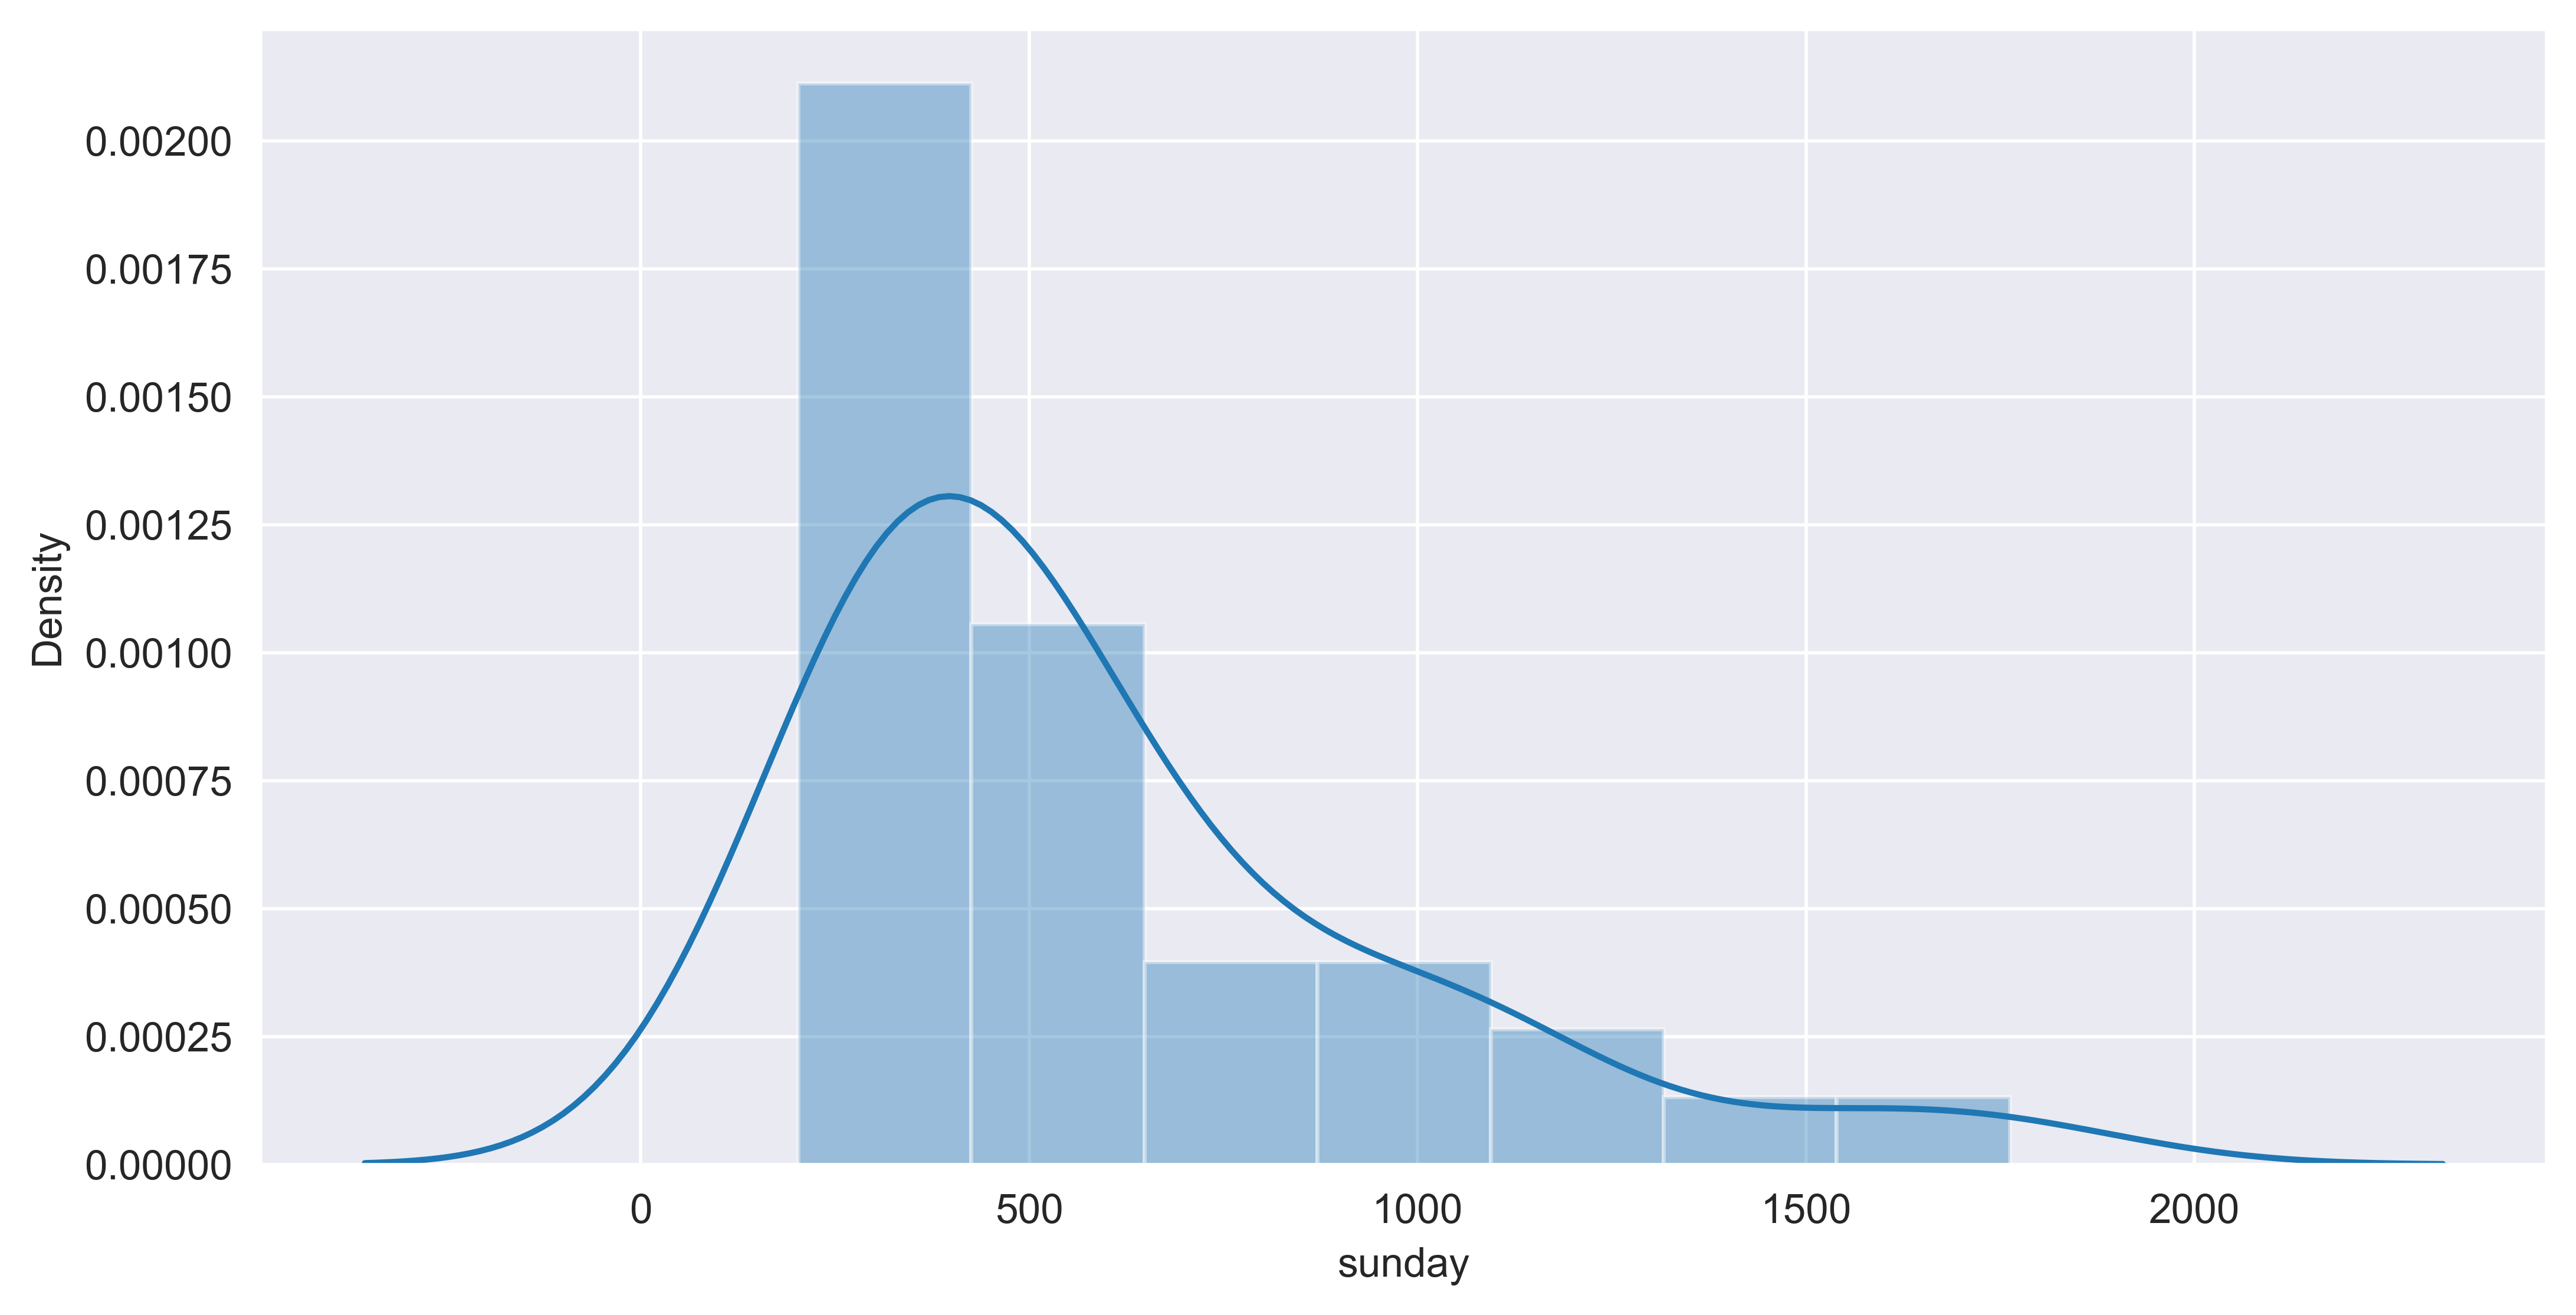

In [8]:
sns.distplot(data['sunday'])

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

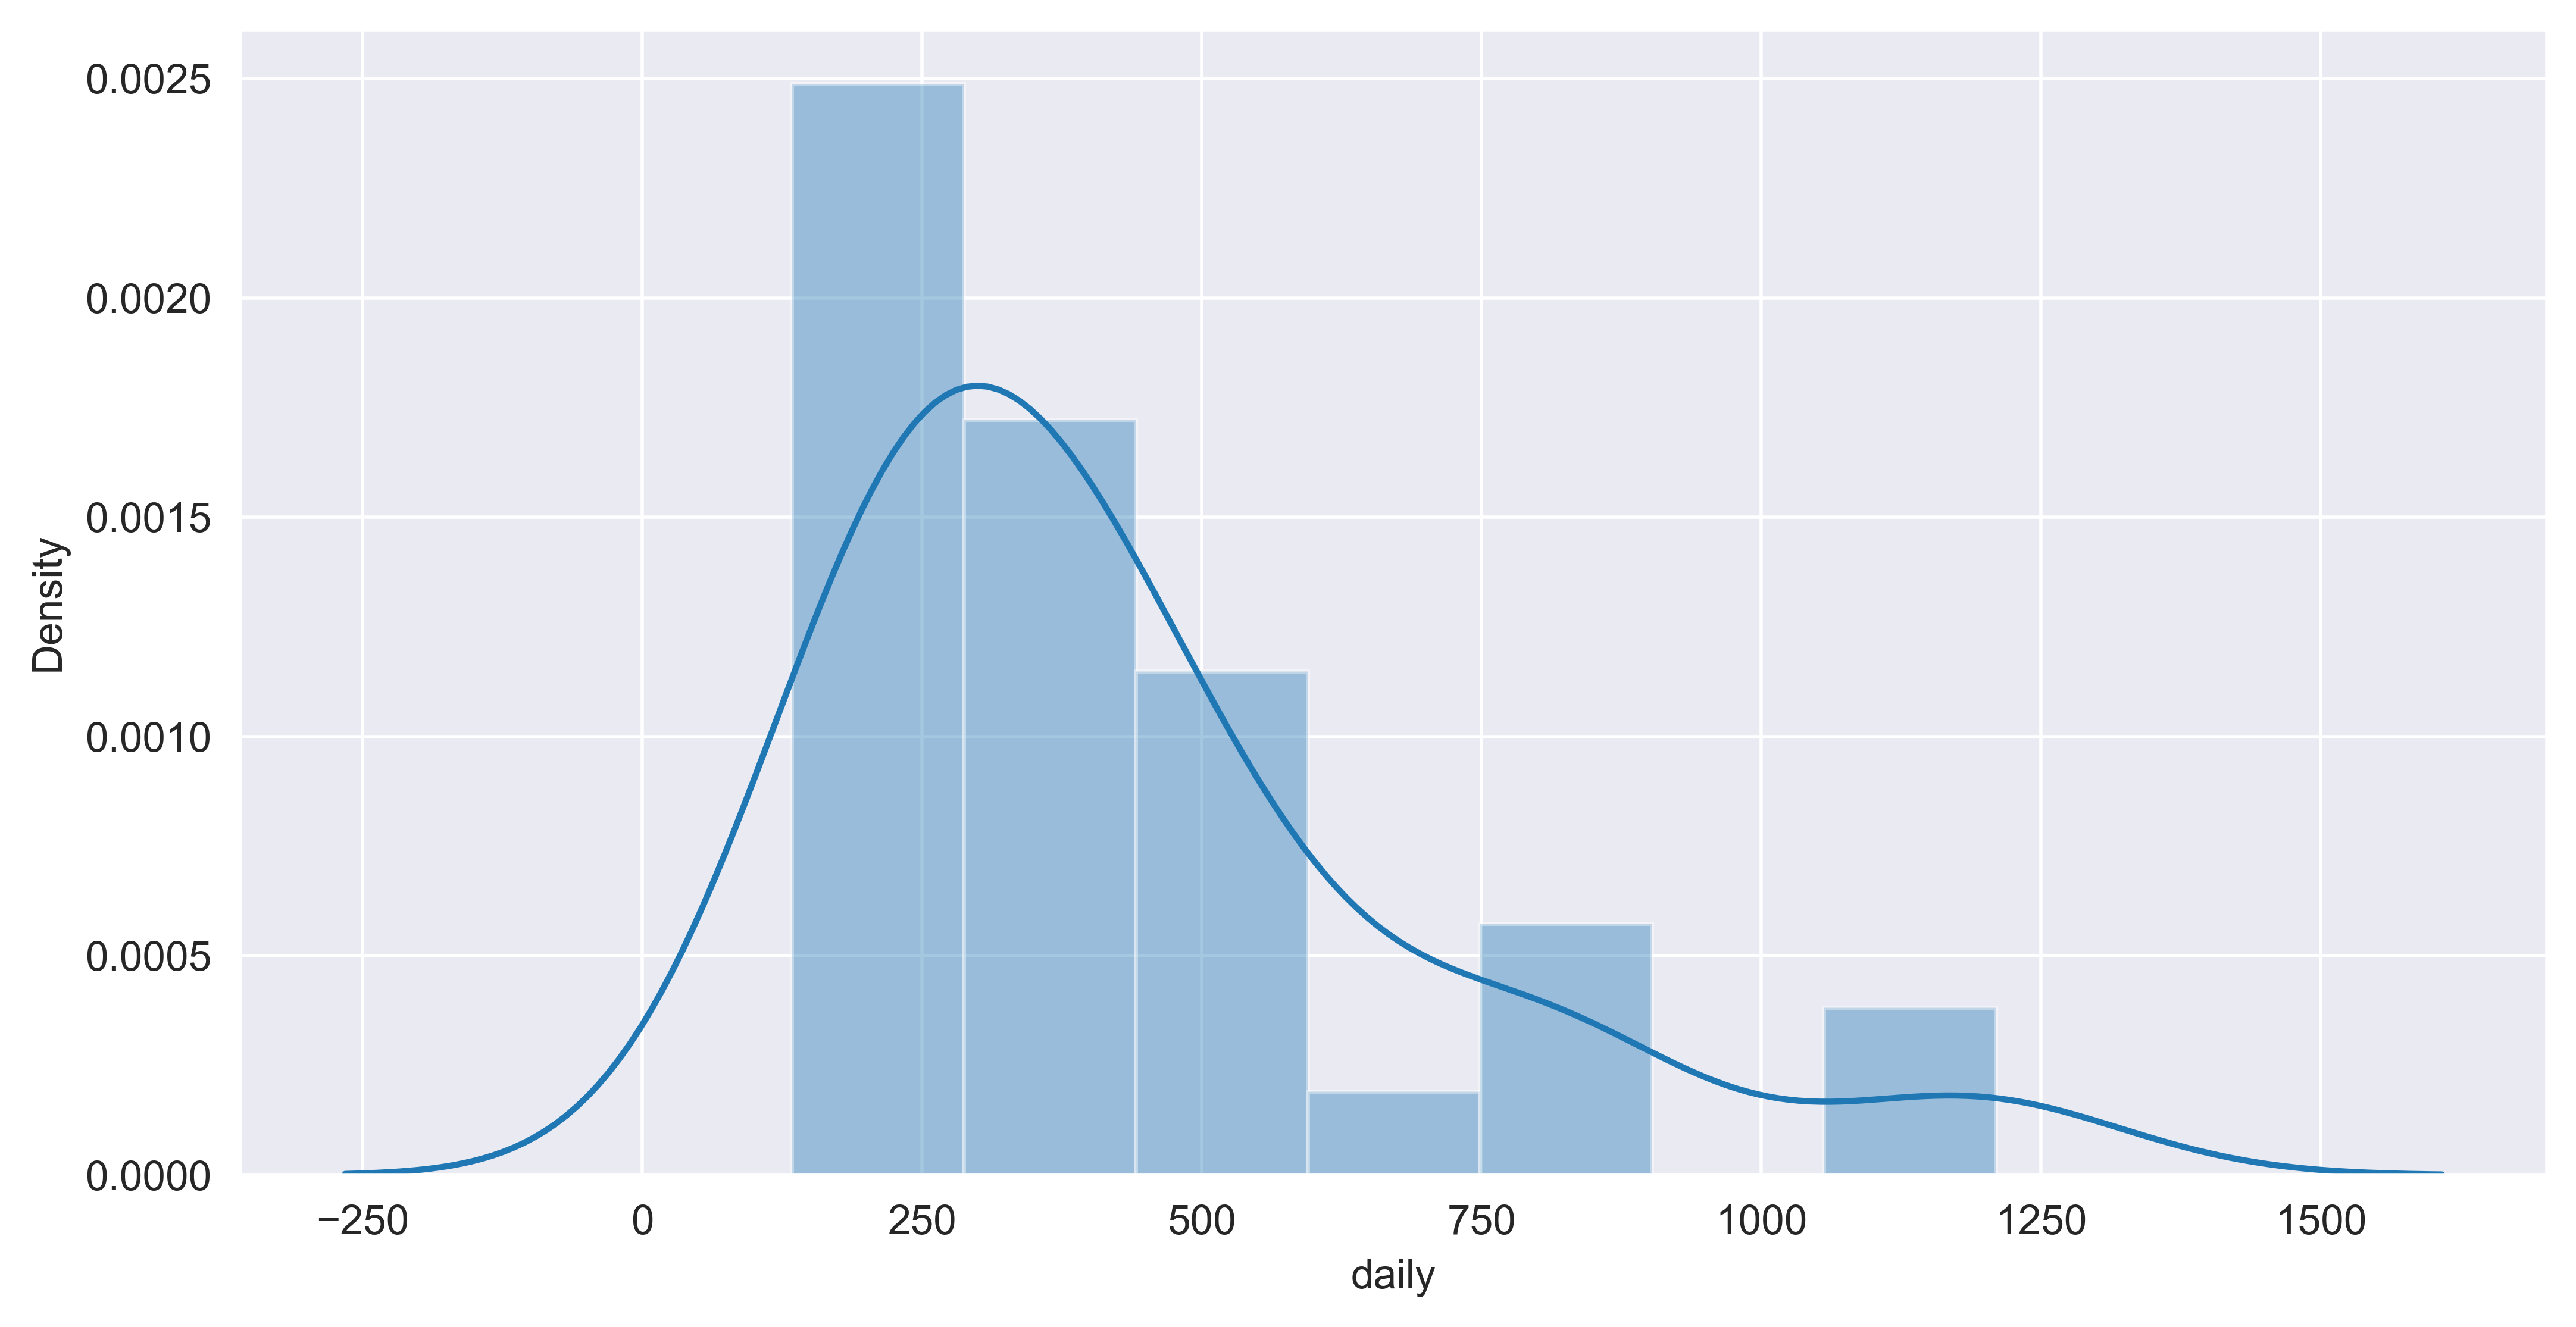

In [9]:
sns.distplot(data['daily'])

In [10]:
#Correlation analysis

In [11]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

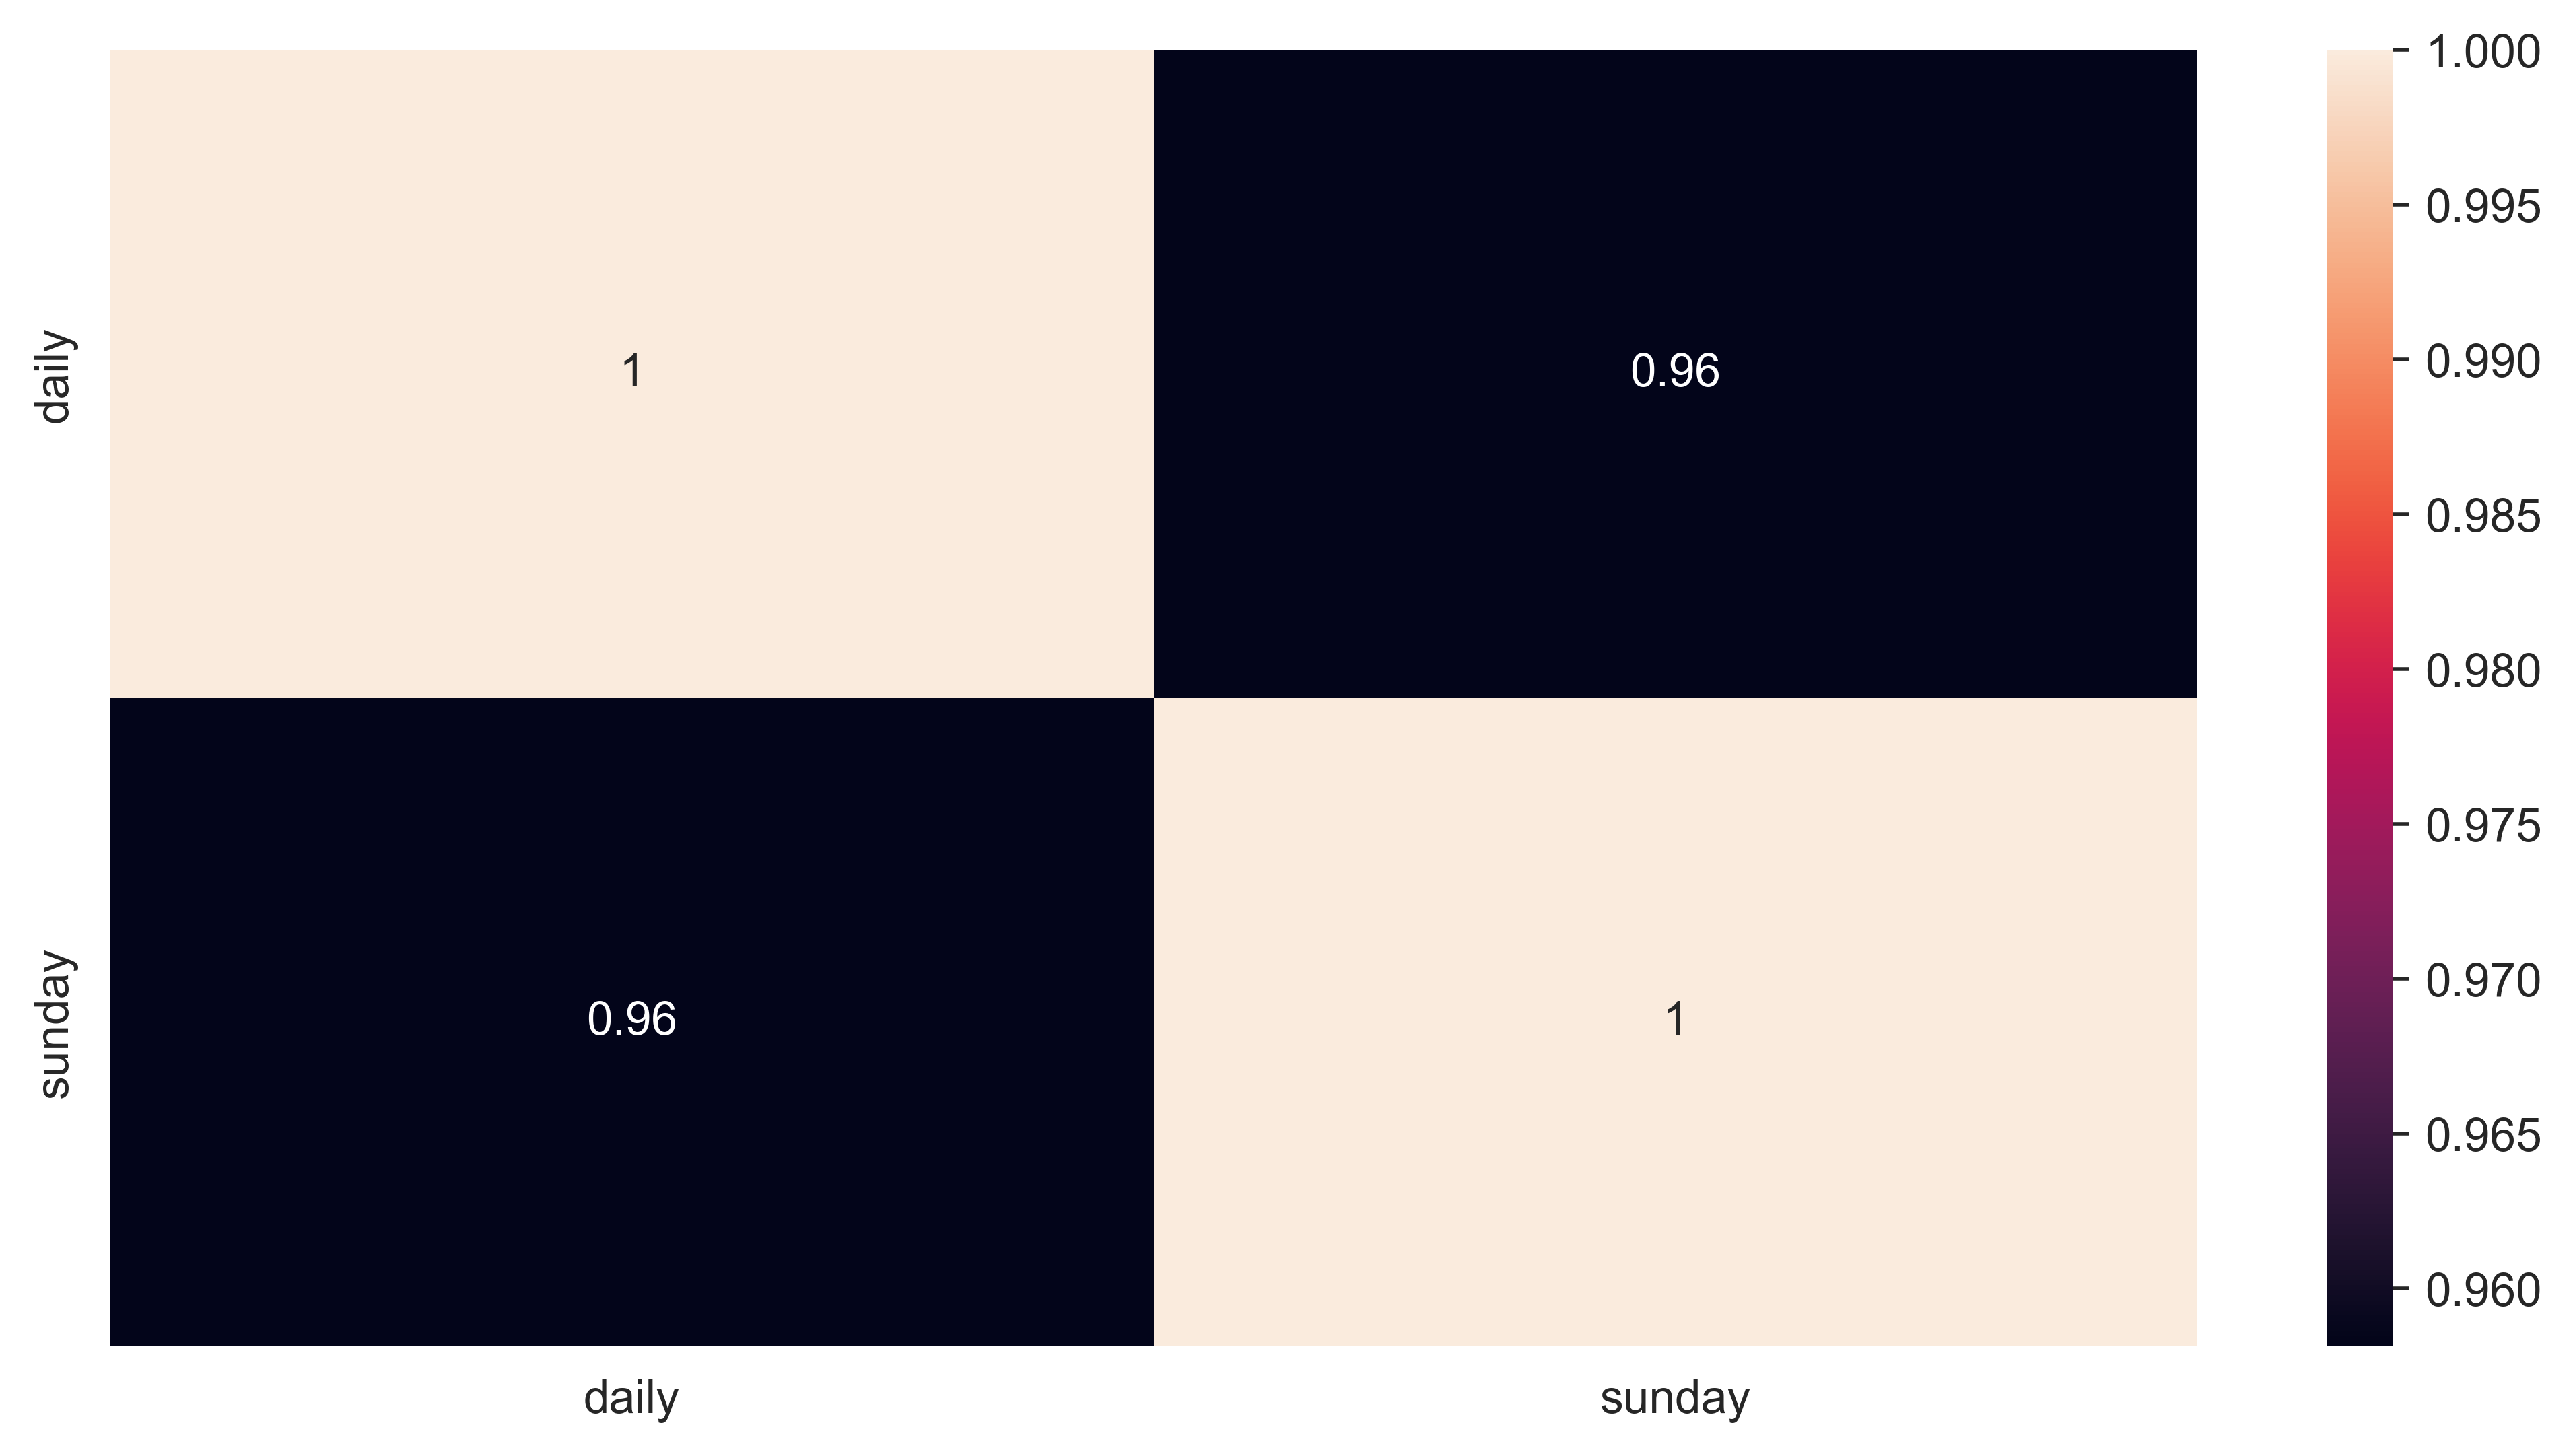

In [12]:
sns.heatmap(data.corr(), annot=True)

In [13]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='daily', ylabel='sunday'>

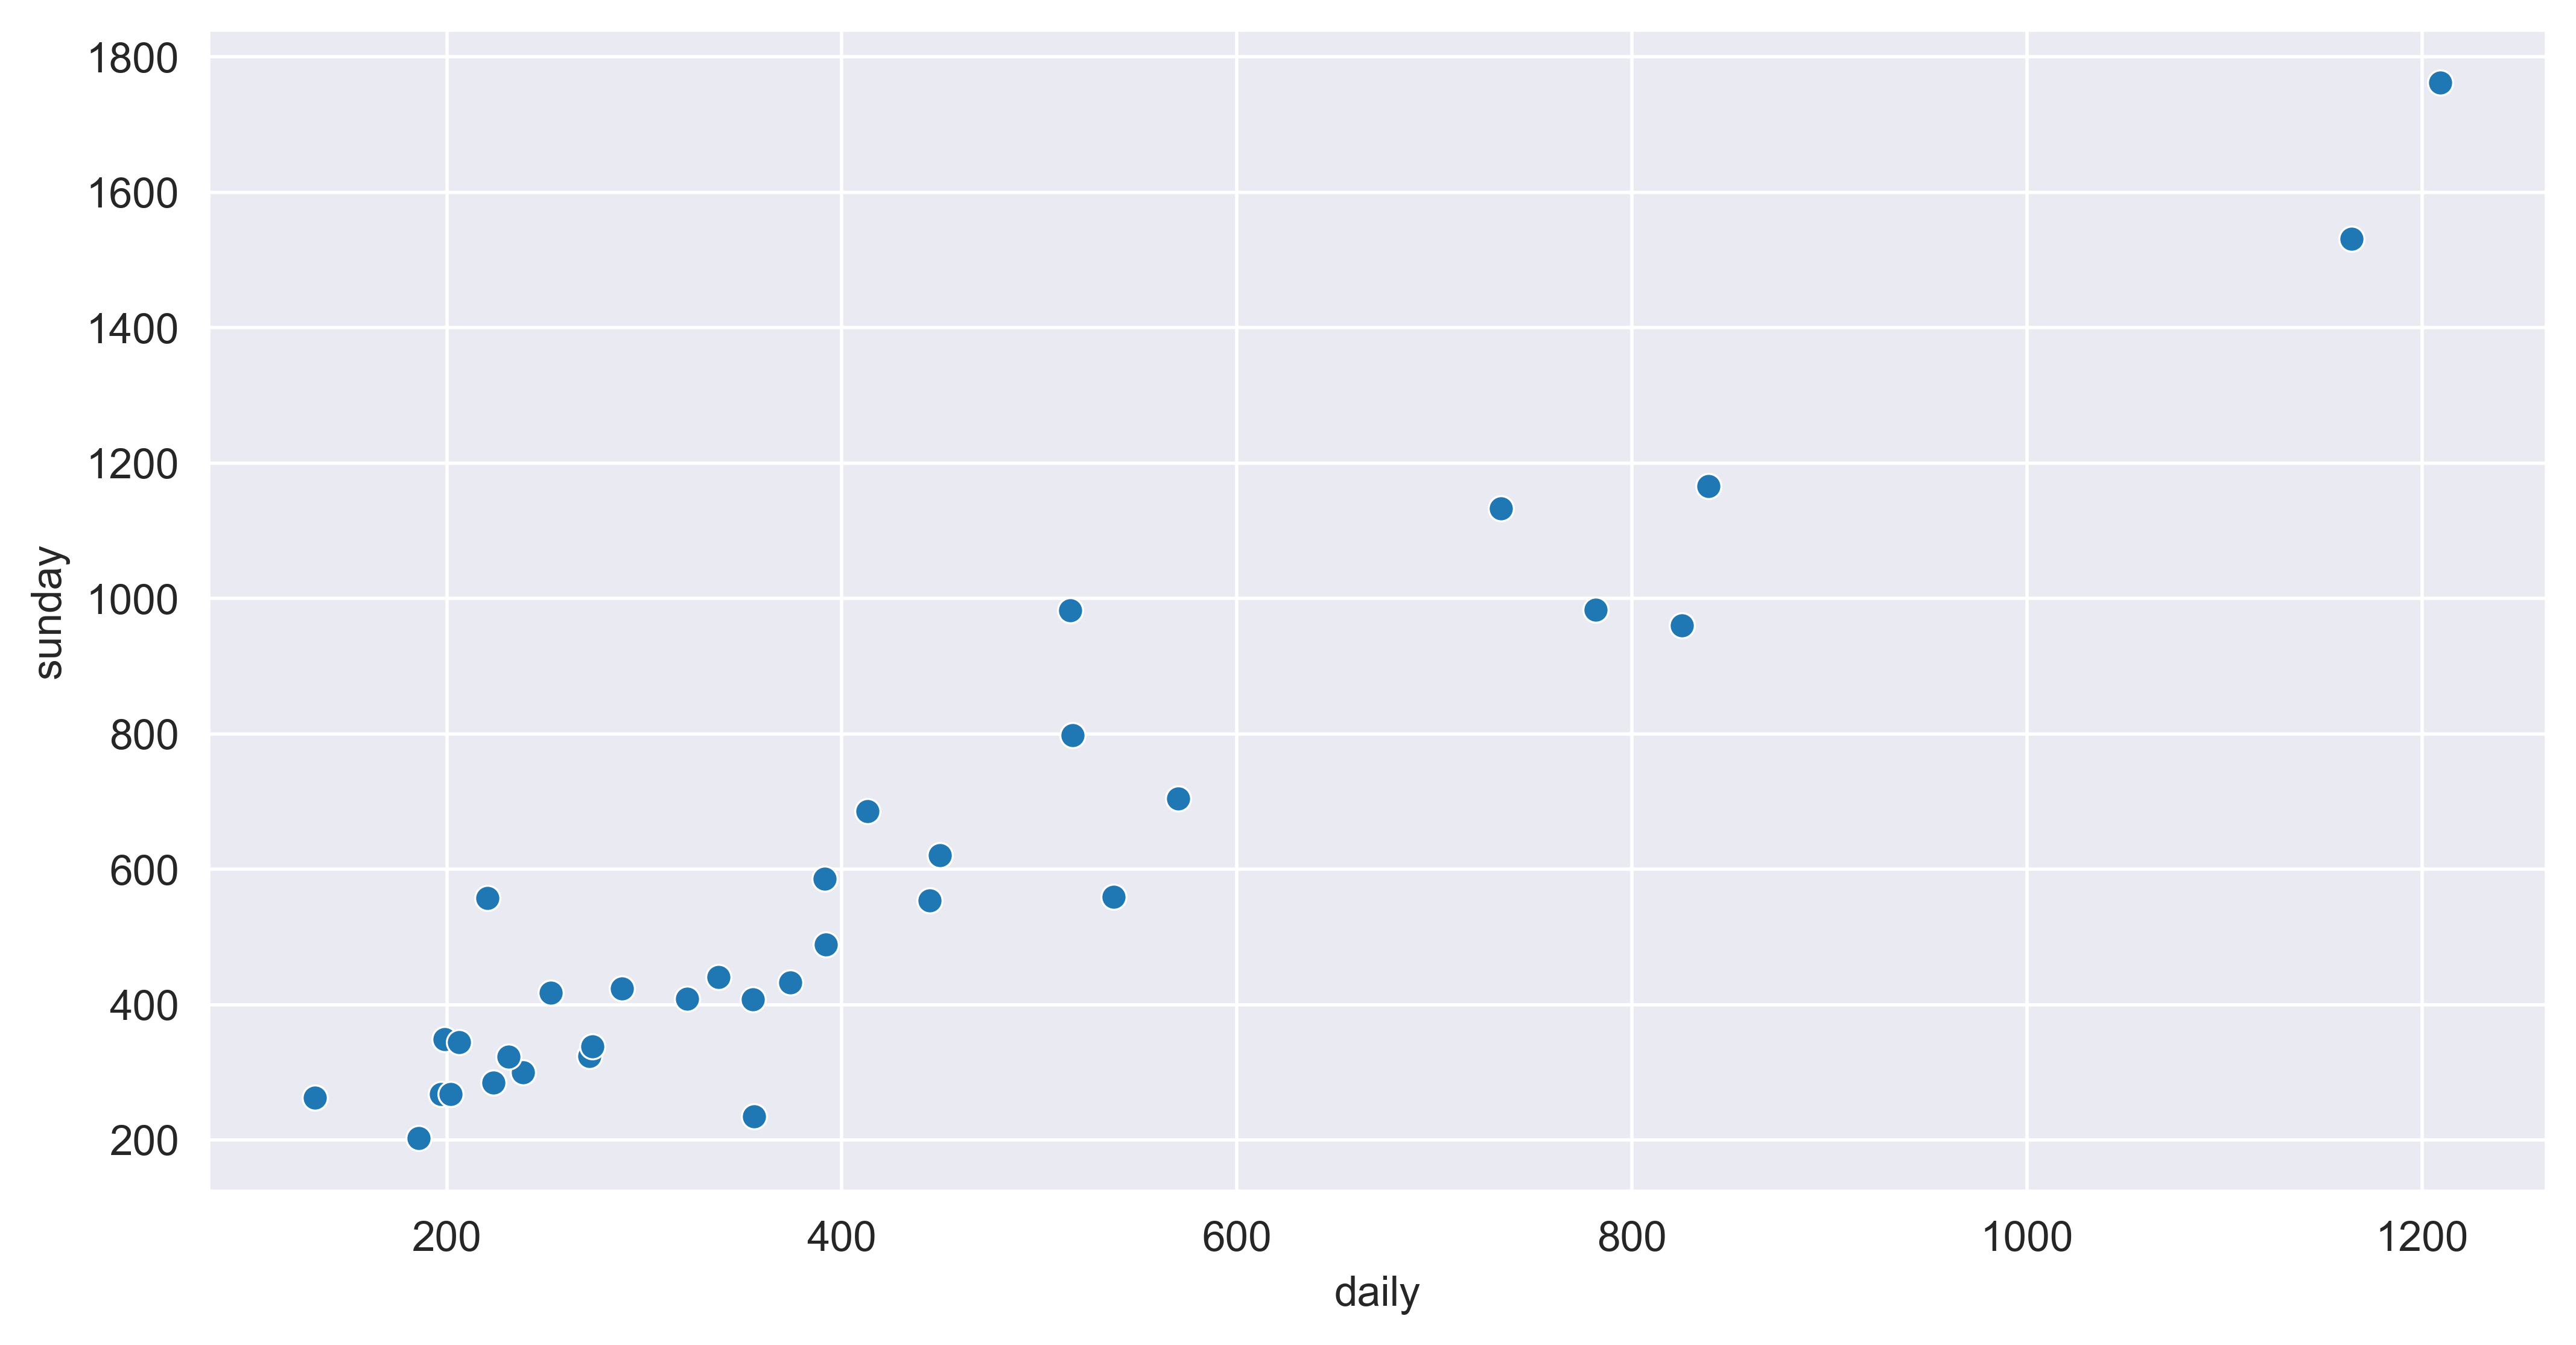

In [14]:
#Scatter plot
sns.scatterplot(data['daily'],data['sunday'])

In [15]:
#Import statsmodels

In [16]:
import statsmodels.formula.api as smf

In [17]:
#Train the data

In [18]:
model = smf.ols('sunday~daily', data=data).fit()

# ols = ordinary least square method

In [19]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

- slope is 1.33 and intercept is 13.83
- (daily = 1.33 ) = If we change 1 unit on daily column then how my unit changes on target column(sunday)

In [20]:
model

In [21]:
# Print values `for t value and p value
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [22]:
# r2 value
model.rsquared

0.9180596895873295

- 91 % Accuracy

In [23]:
#Regression plot

<AxesSubplot:xlabel='daily', ylabel='sunday'>

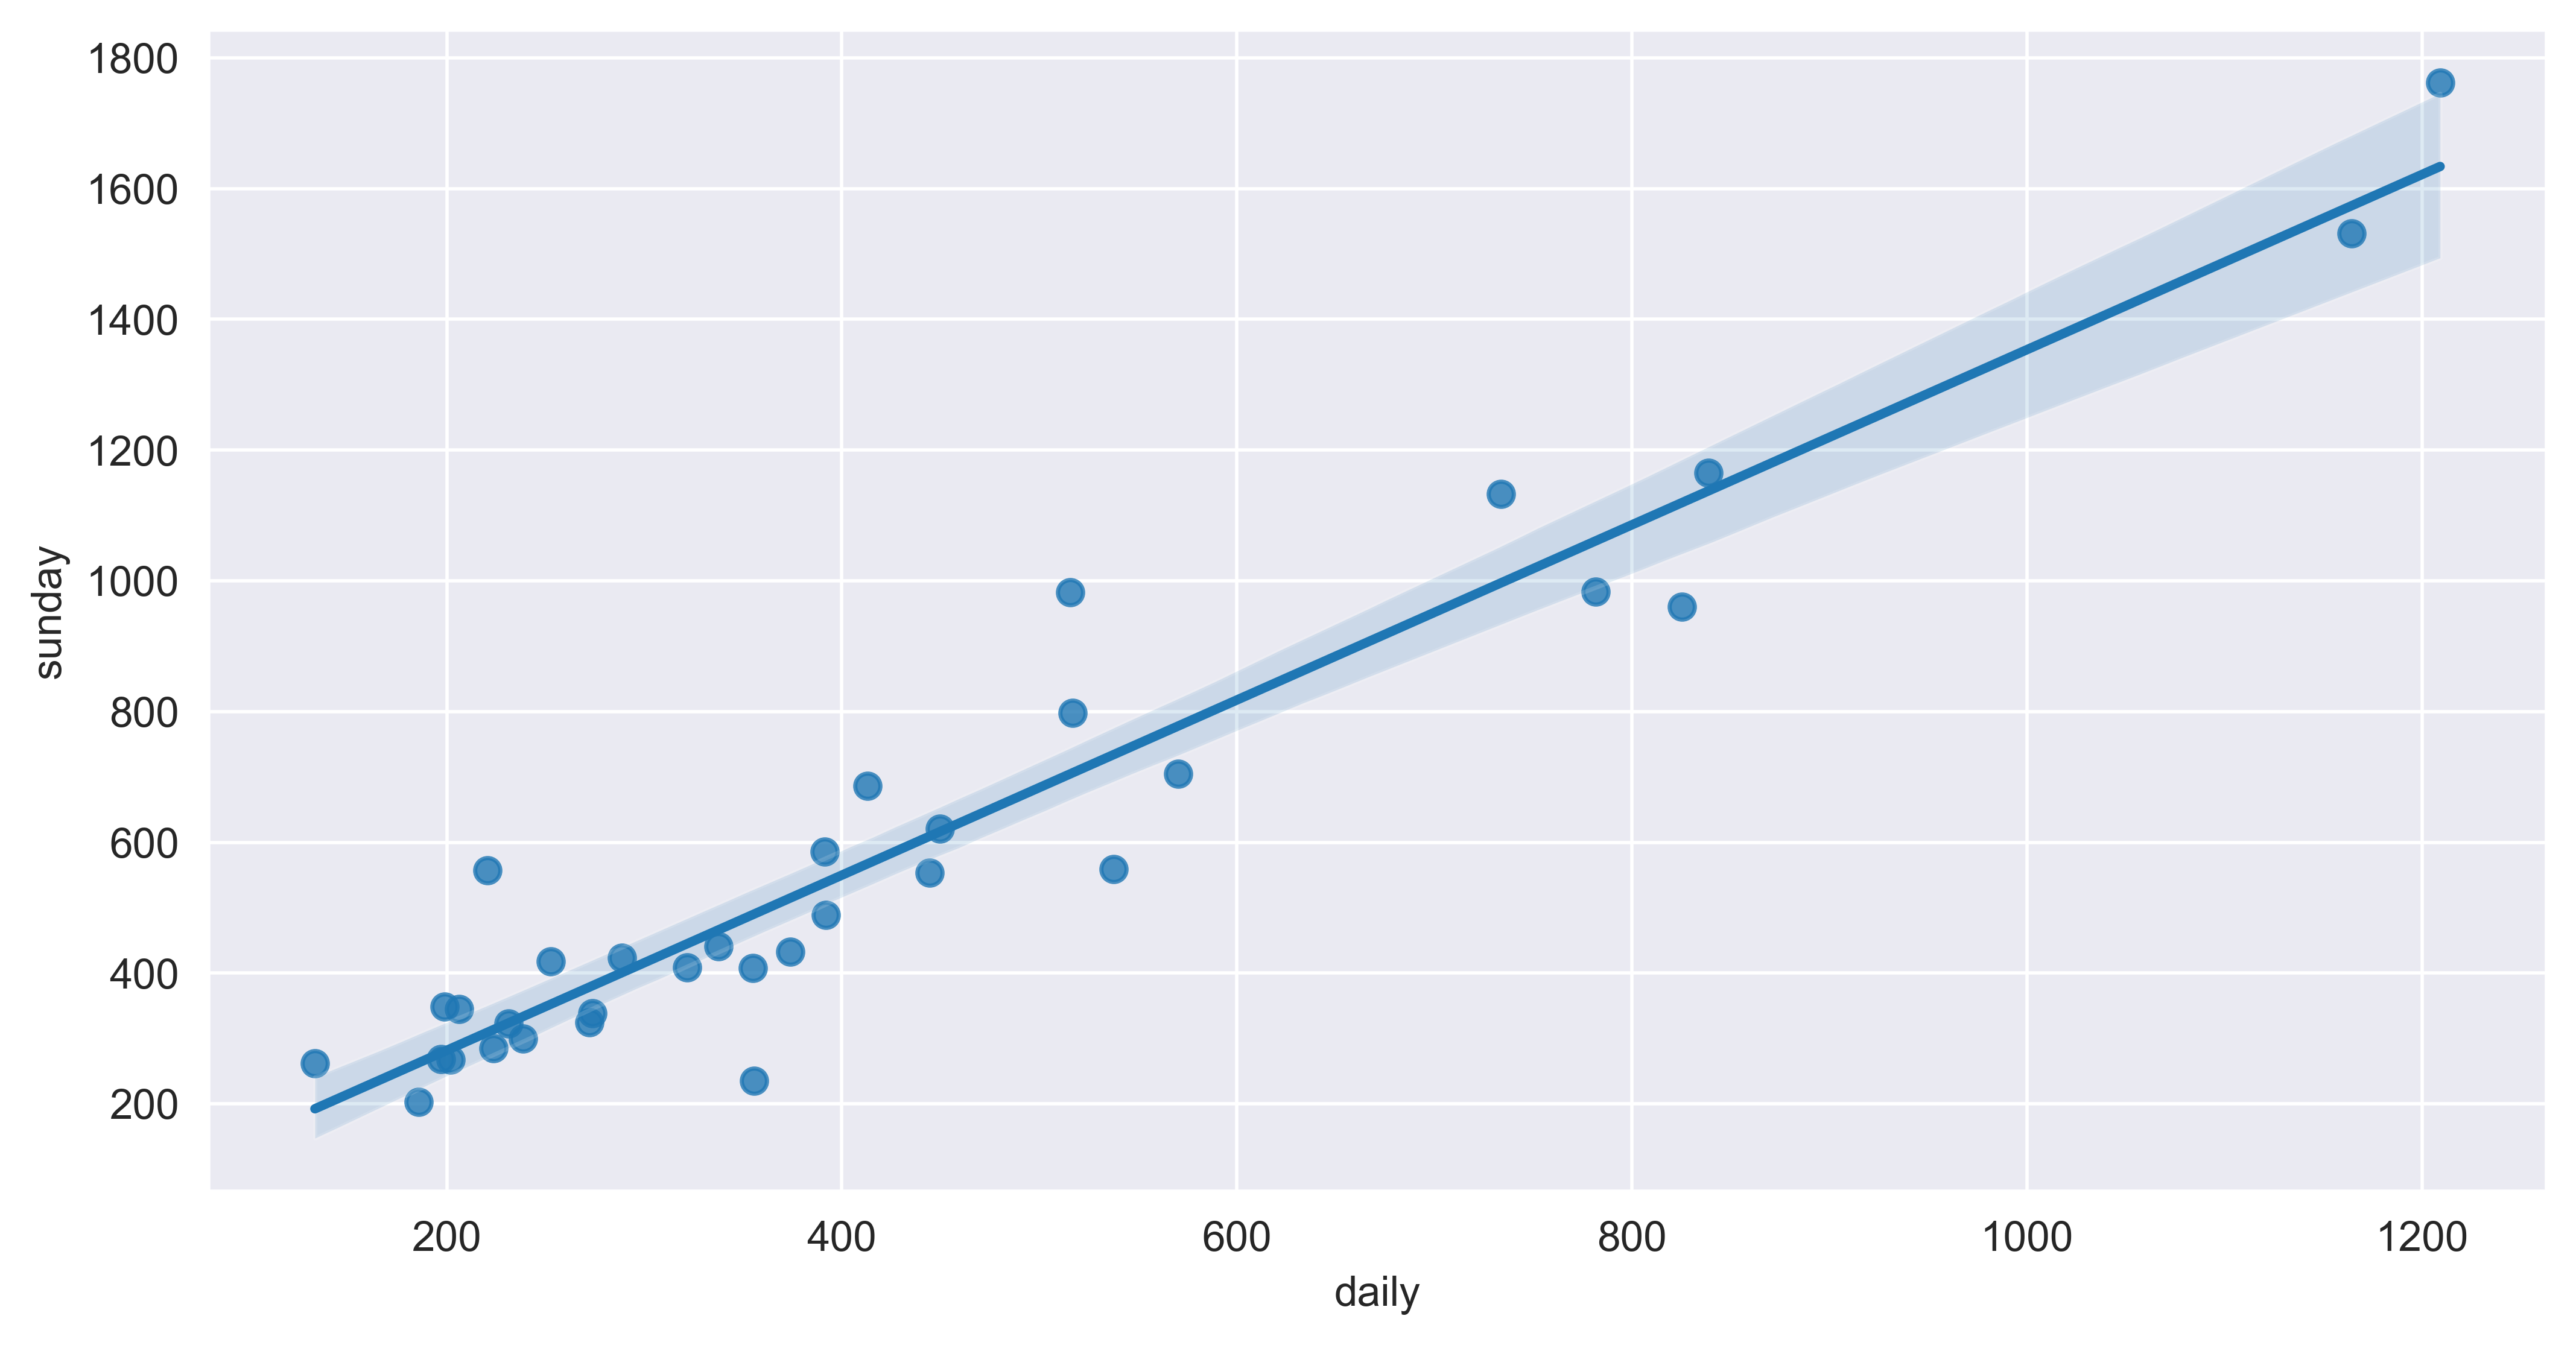

In [24]:
sns.regplot(df['daily'], df['sunday'])

In [25]:
#Model parameters

In [26]:
#r2 value

print(model.rsquared, model.rsquared_adj)

0.9180596895873295 0.9154990548869336


# Prediction for new data

In [27]:
newdata = pd.Series([200,500,800,450,850,456,652])
 
newdata = pd.DataFrame(newdata, columns=['daily'])

In [28]:
newdata

,daily
0,200
1,500
2,800
3,450
4,850
5,456
6,652


In [29]:
model.predict(newdata)

0     281.778581
1     683.693009
2    1085.607436
3     616.707271
4    1152.593174
5     624.745559
6     887.329652
dtype: float64

###  Data Transformation
### To remove skewness

1. sqrt
2. Log

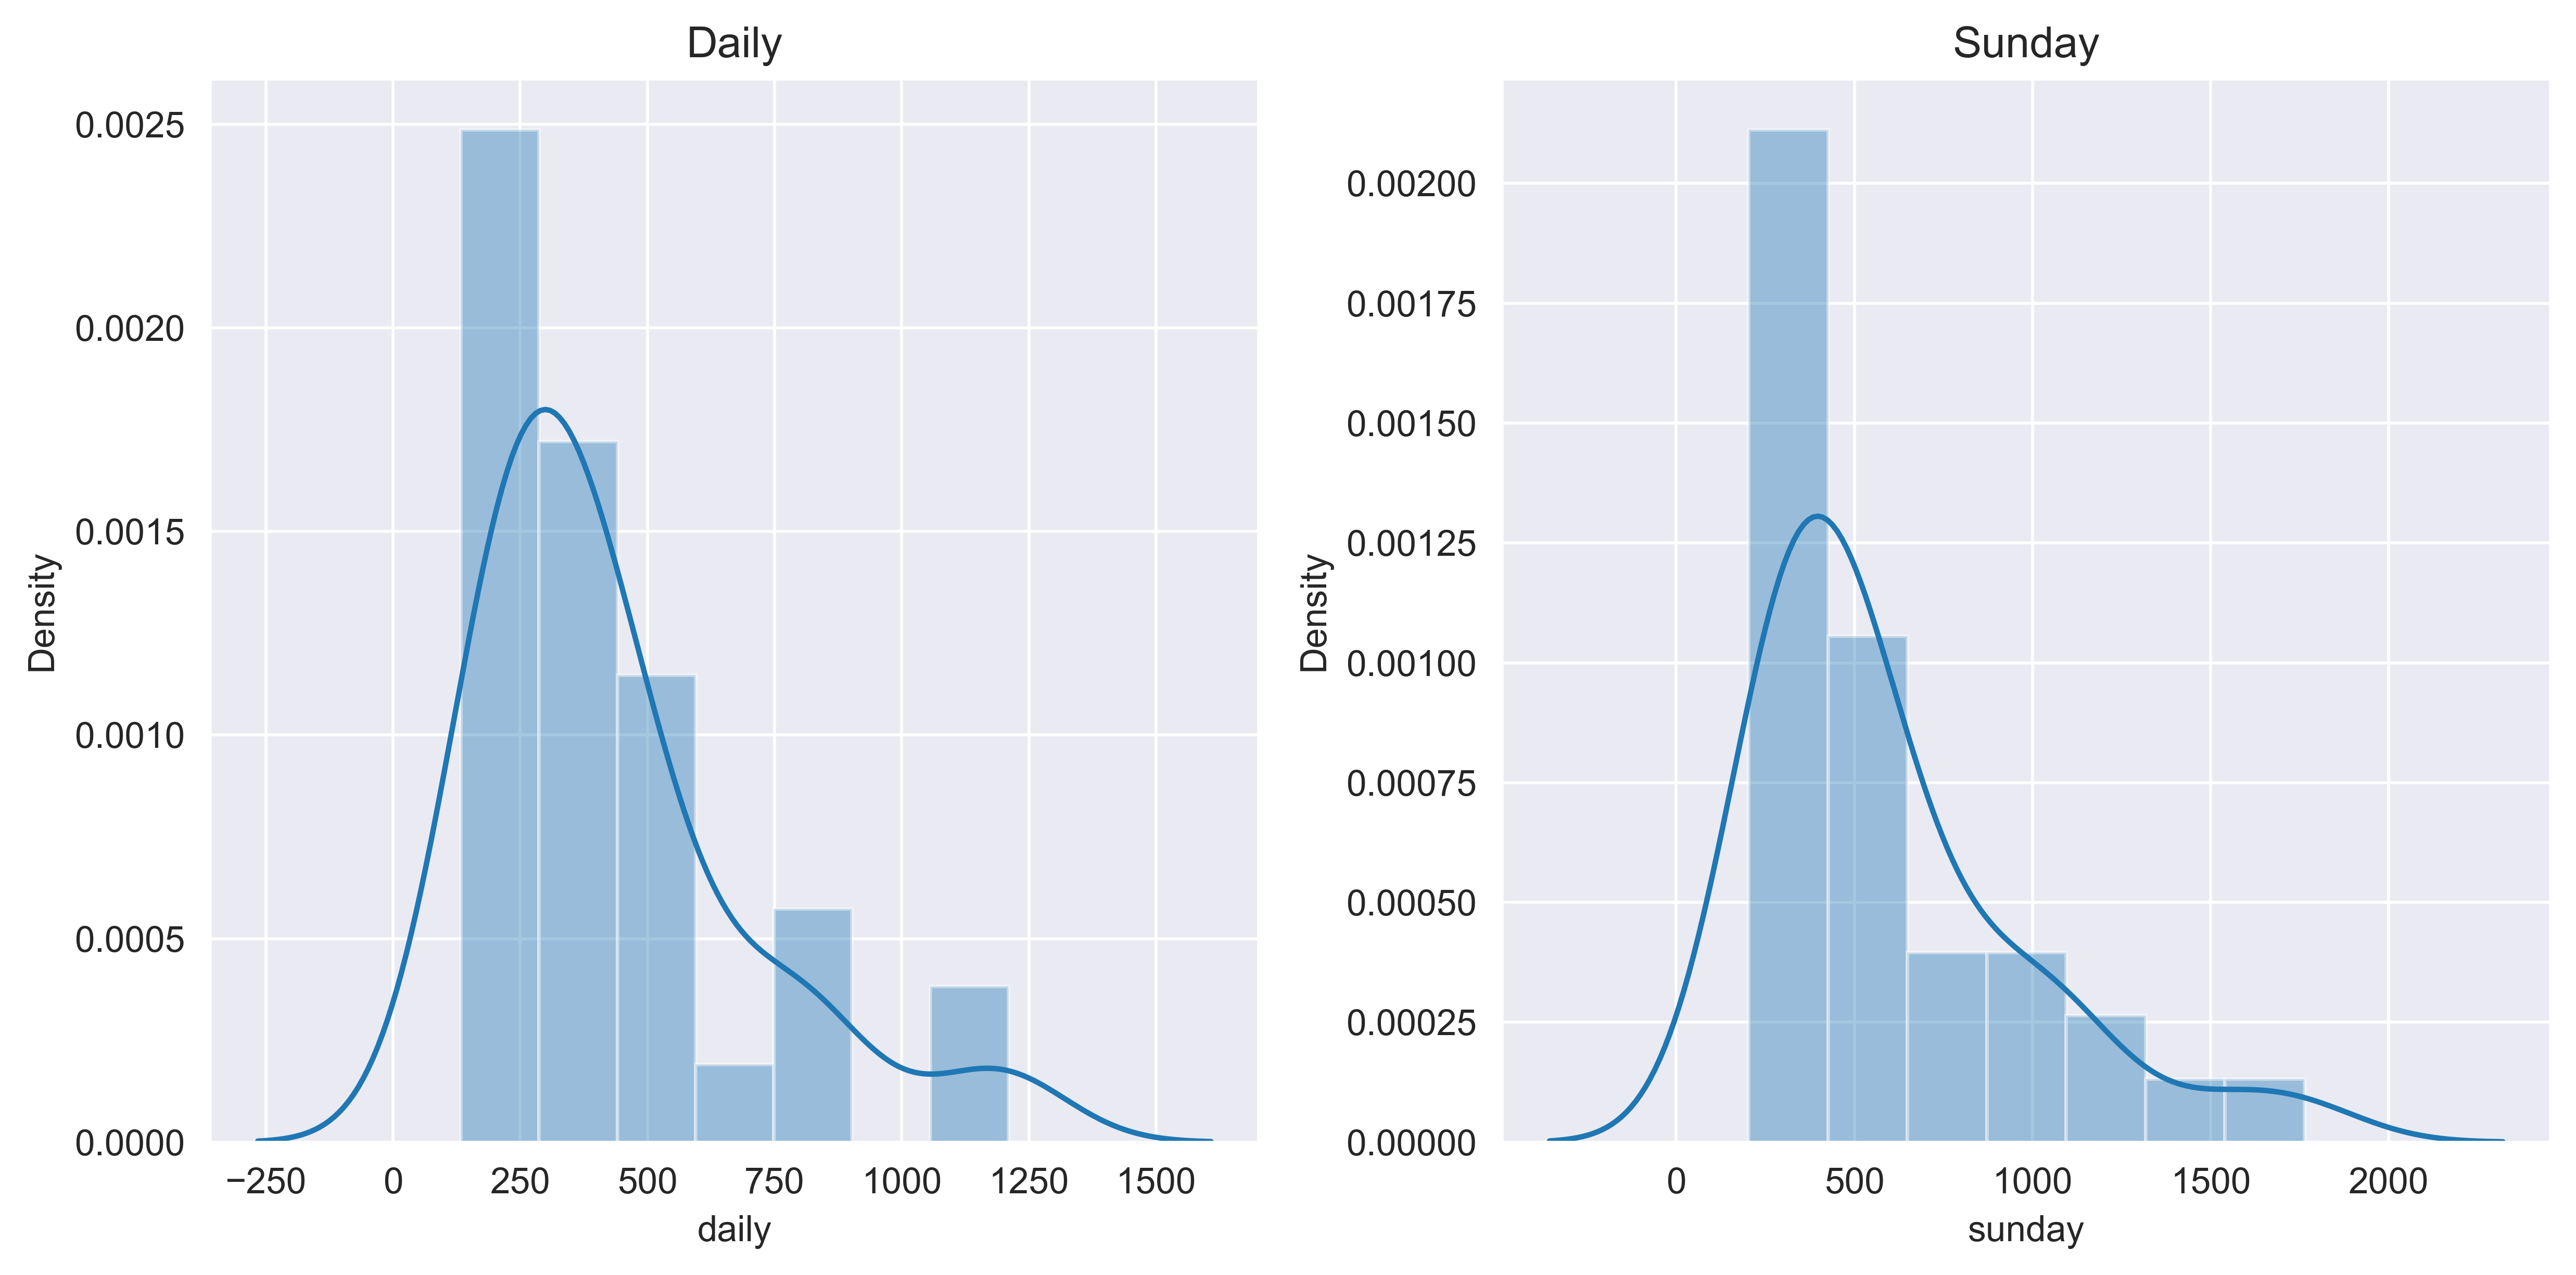

In [30]:
plt.subplot(1,2,1)
sns.distplot(data['daily'])
plt.title('Daily')

plt.subplot(1,2,2)
sns.distplot(data['sunday'])
plt.title('Sunday')

plt.tight_layout()

In [31]:

data['daily'].skew()

1.5321591323040094

In [32]:
data['sunday'].skew()

1.5644730738925112

# Log transformation

In [33]:
data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [34]:
data['Log_daily'] = np.log(data['daily'])
data['Log_sunday'] = np.log(data['sunday'])

In [35]:
data.head()

,daily,sunday,Log_daily,Log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316


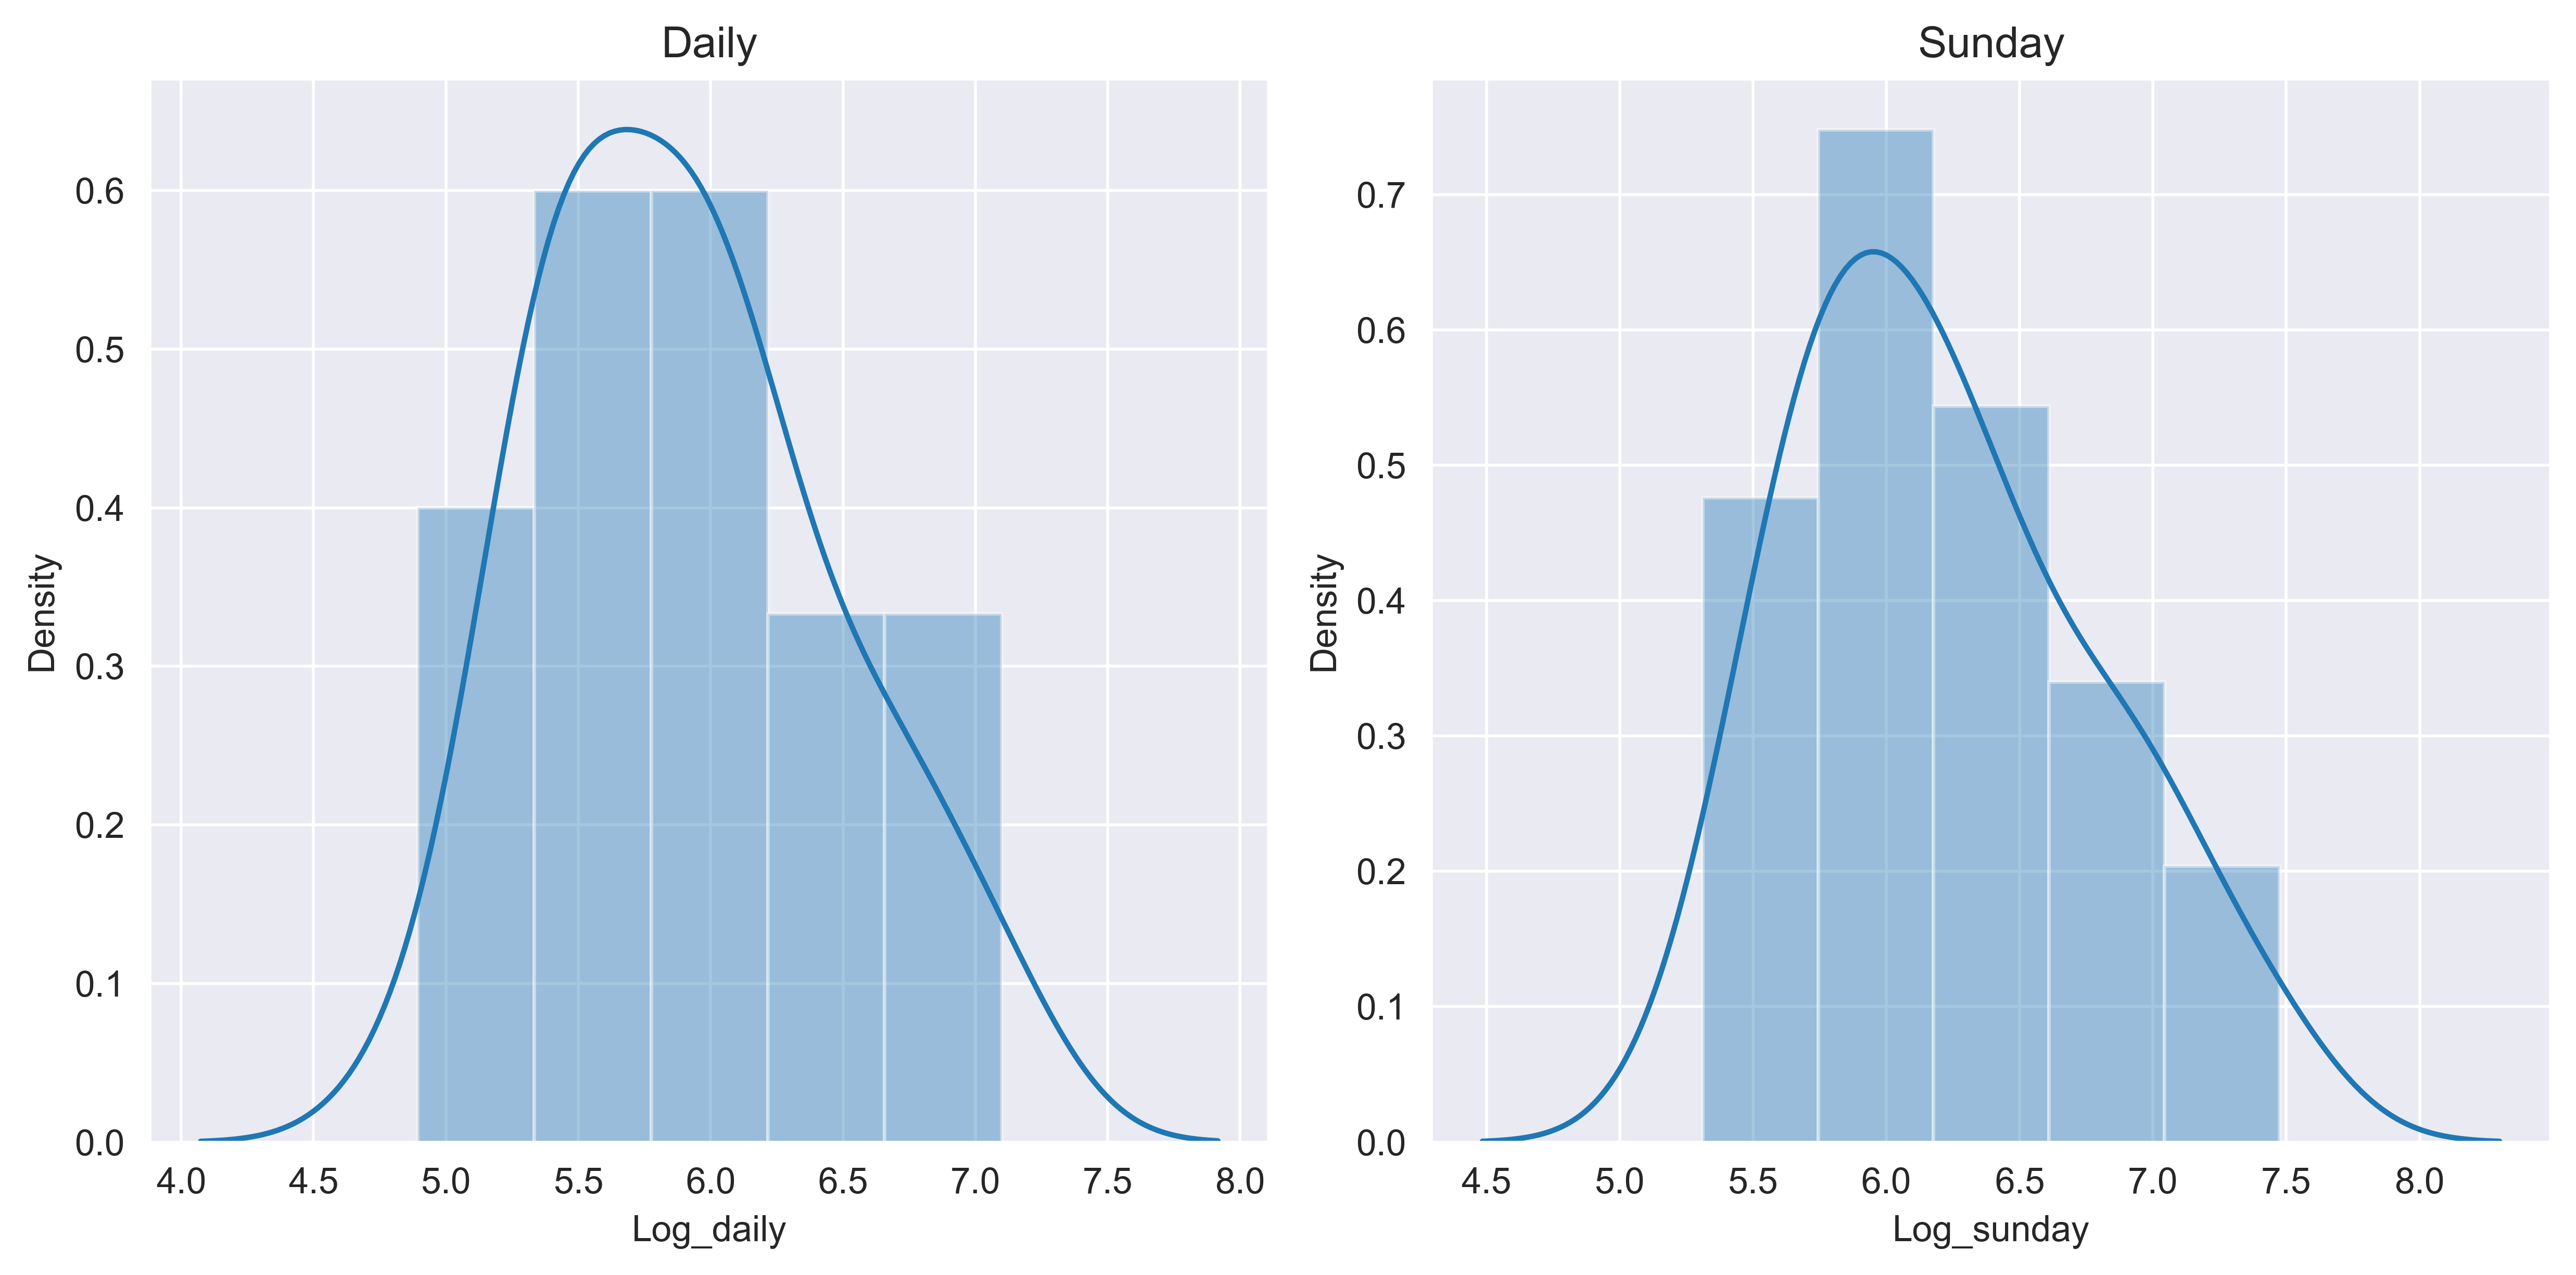

In [40]:
 plt.subplot(1,2,1)
sns.distplot(data['Log_daily'])
plt.title('Daily')

plt.subplot(1,2,2)
sns.distplot(data['Log_sunday'])
plt.title('Sunday')

plt.tight_layout()

plt.show()

- Skew ness has been removed

In [42]:
data['Log_daily'].skew()

0.4682202000020356

In [43]:
data['Log_sunday'].skew()

0.5337572087816101